In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Table, Column, Integer, String, Float
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy import create_engine, inspect
from sqlalchemy import create_engine, inspect, join, outerjoin, MetaData
from sqlalchemy.ext.automap import automap_base
import numpy as np
import pandas as pd


In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Connect to database
engine=create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()
meta=MetaData()
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
# Create an inspector and connect it to the engine
inspector=inspect(engine)
#dir(inspector)
# View table names
tables=inspector.get_table_names()
tables

['measurement', 'station']

In [9]:
# We can view all of the classes that automap found
tables = Base.classes.keys()

In [10]:
# Save references to each table
measurement = Base.classes['measurement']
station = Base.classes['station']



In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)
measurement = Base.classes.measurement
session.query(measurement.station,measurement.date,measurement.prcp,measurement.tobs).first()

('USC00519397', '2010-01-01', 0.08, 65.0)

# Exploratory Climate Analysis

In [14]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results
havaii = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).group_by(measurement.date).all()
havaii

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

havaii_last_months= session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date, =havaii_last_months
year,month,day = last_date.split('-')
query_date = dt.date(int(year),int(month),int(day)) - dt.timedelta(days=365)
print("Last Date Measured: ",last_date)
print("Query Date: ",query_date)

Last Date Measured:  2017-08-23
Query Date:  2016-08-23


In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column


session=Session(engine)
station=Base.classes.station
session.query(station.station,station.name).all()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

havaii_df = pd.DataFrame(havaii)
havaii_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
361,2017-08-19,0.00
362,2017-08-20,0.00
363,2017-08-21,0.00
364,2017-08-22,0.00


In [18]:

# Sort the dataframe by date
havaii_df.sort_values(["date"]).head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


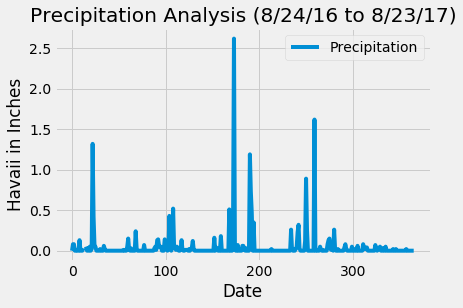

In [33]:
 #Use Pandas Plotting with Matplotlib to plot the data
havaii_df.plot()
plt.xlabel("Date")
plt.ylabel("Havaii in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.savefig("Precipitation")
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
havaii_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement.station).group_by(measurement.station).count()
print(f'There are total number of {stations} stations available in this dataset.')

There are total number of 9 stations available in this dataset.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
activity_station= session.query(measurement.station,func.count(measurement.station))\
                                .group_by(measurement.station)\
                                .order_by(func.count(measurement.station).desc())

# List the stations and the counts in descending order.
for row in activity_station:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [23]:
# most active station

highest_activity = activity_station[0][0]
print(f"{highest_activity} is the highest number")

USC00519281 is the highest number


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

r_highest_activity = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == highest_activity).all()

print(f"Station: {highest_activity}\n\
    Lowest temperature recorded:  {r_highest_activity[0][0]}\n\
    Highest temperture recorded :  {r_highest_activity[0][1]}\n\
    Average temperature recorded:  {r_highest_activity[0][2]}")

Station: USC00519281
    Lowest temperature recorded:  54.0
    Highest temperture recorded :  71.66378066378067
    Average temperature recorded:  85.0


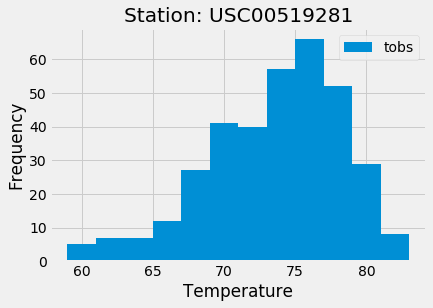

In [25]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station == highest_activity).\
    filter(measurement.date > query_date).\
    order_by(measurement.date).all()

temperature_df=pd.DataFrame(temperature)
plt.hist(temperature_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station: " + highest_activity)
plt.legend(["tobs"], loc="best")

plt.savefig("temp.png")
plt.show()

# Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_year = calc_temps('2011-02-28', '2011-03-05')
print(prev_year)

[(61.0, 69.75510204081633, 75.0)]


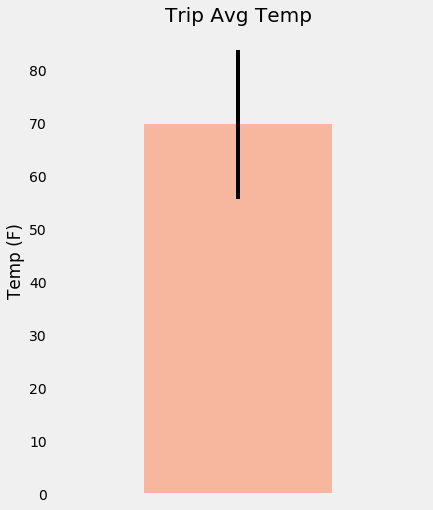

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

prev_year_df = pd.DataFrame(prev_year, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = prev_year_df['Avg Temp']
min_max_temp = prev_year_df.iloc[0]['Max Temp'] - prev_year_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()
